<a href="https://colab.research.google.com/github/subhajitmajumder/python_program/blob/master/me_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seaborn** is a statistical plotting library.It helps to plot detailed statistical data in very beautiful styles.It also works with pandas dataframe objects.

**Installation guide:** pip install seaborn

**For anaconda** conda install seaborn

**Official Documentation**  https://github.com/mwaskom/seaborn





In [0]:
import seaborn as sns

In [0]:
%matplotlib inline

Seaborn actually comes with some build-in datasets which we can access.Lets explore one of the datasets

In [0]:
tips = sns.load_dataset('tips')

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Lets jump into our first plotting.

###Dist Plot

Dist plot allows us to plot a univariate distribution of observation.This function combines with matplotlib hist function and seaborn's kdeplot() and rugplot() functions.

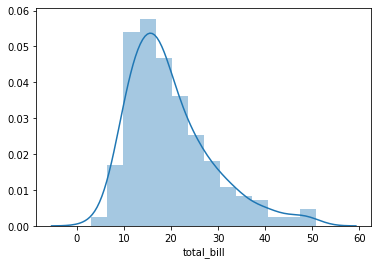

In [7]:
sns.distplot(tips['total_bill'])

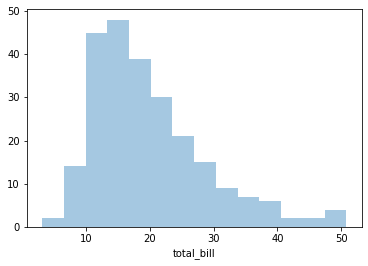

In [8]:
sns.distplot(tips['total_bill'], kde=False)

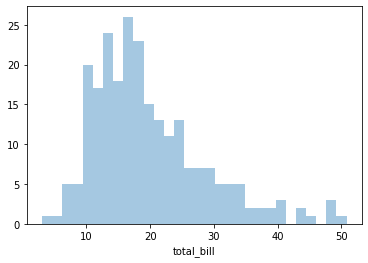

In [9]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

**jointplot** is a kind of plot which match up with two dist-plots for bivariate data.

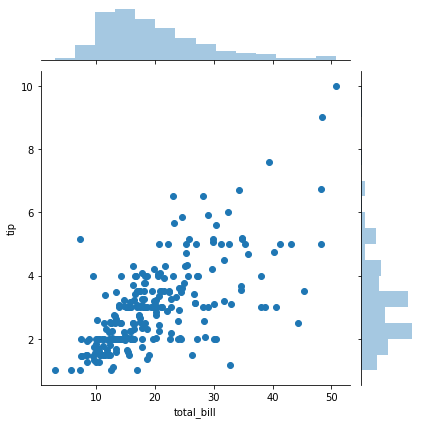

In [13]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')
#Scatter is the by default kind of jointplot

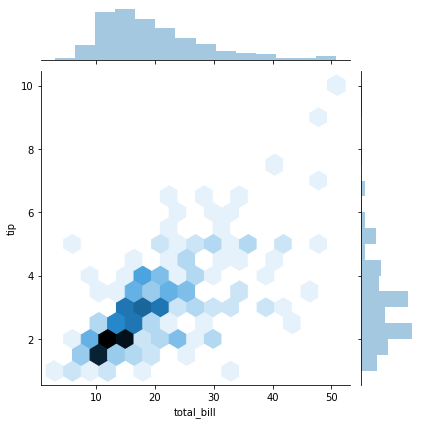

In [14]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

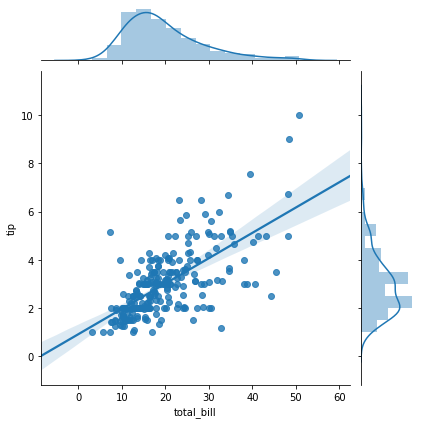

In [15]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

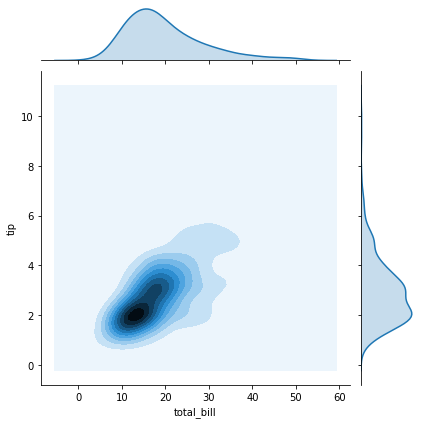

In [16]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

**Pairplot** is a type of plot that provides pairwise relationship accross the dataframe.

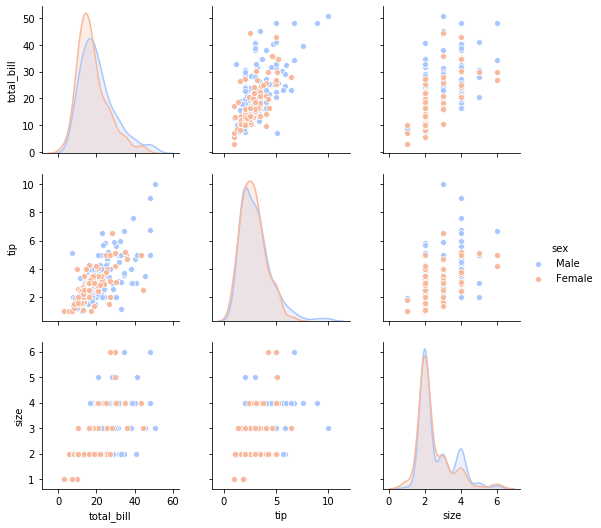

In [20]:
sns.pairplot(tips, hue='sex', palette='coolwarm')
#hue colors the dataframe based on the column that we put on hue argument

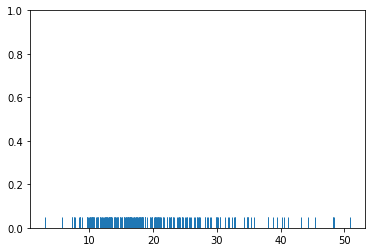

In [21]:
sns.rugplot(tips['total_bill'])

**KDE** stands for **Kernal Density Estimation** plot 

(0, 1)

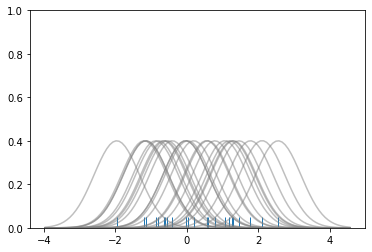

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

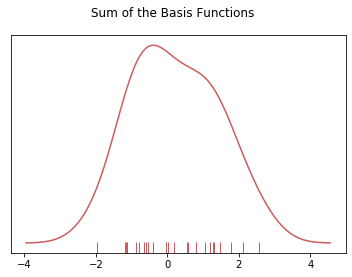

In [23]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

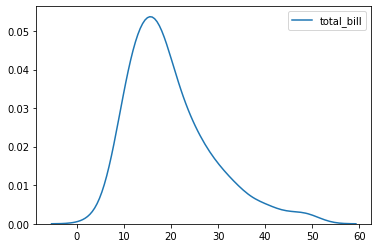

In [24]:
sns.kdeplot(tips['total_bill'])

##Categorical Plots

In [5]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
import numpy as np
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Barplot** is one of the mmost common types of plots.It shows the relationship between neumerical variables and categorical variables.It is actually a visualisation of group-by action.

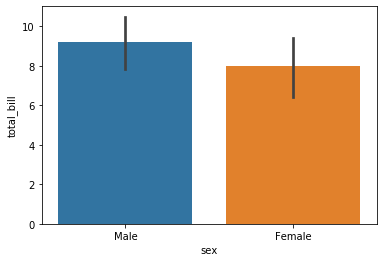

In [6]:
sns.barplot(x= 'sex', y= 'total_bill', data= tips, estimator=np.std)

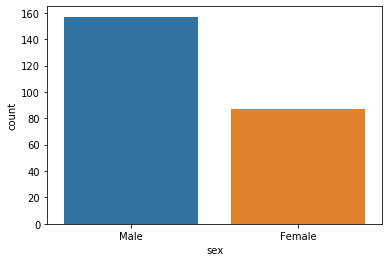

In [7]:
sns.countplot(x = 'sex', data=tips)

**Boxplot:** A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

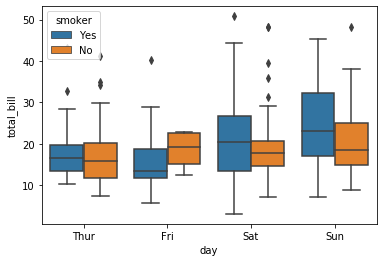

In [9]:
sns.boxplot(x='day', y='total_bill', data=tips, hue= 'smoker')

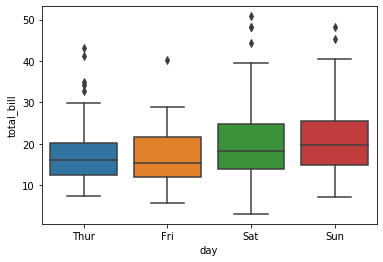

In [10]:
sns.boxplot(x='day', y='total_bill', data=tips)

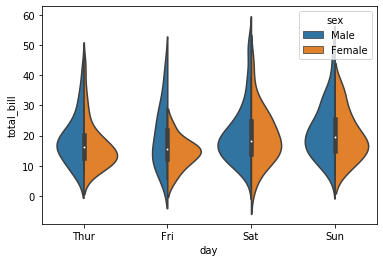

In [13]:
sns.violinplot(x= 'day', y='total_bill', data=tips, hue = 'sex', split=True)

**Stripplot** is a kind of plot where one variable is categorical.

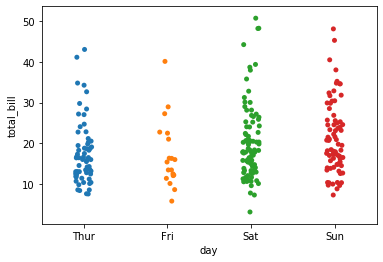

In [14]:
sns.stripplot(x='day', y='total_bill', data=tips)

In stripplot there is a small problem i.e. we can really tell how many points are stacked to each other.To solve this issue we use jitter method

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


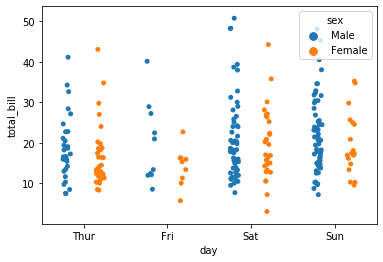

In [16]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', split=True)

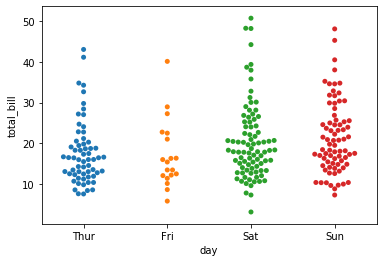

In [17]:
 sns.swarmplot(x='day', y='total_bill', data=tips)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


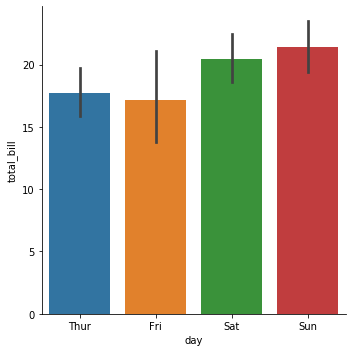

In [19]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


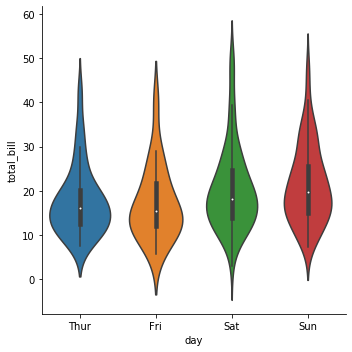

In [20]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='violin')

##Matrix Plot

In [0]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


To create correlation data in a dataframe we need to use corr() method.

In [0]:
tc = tips.corr()

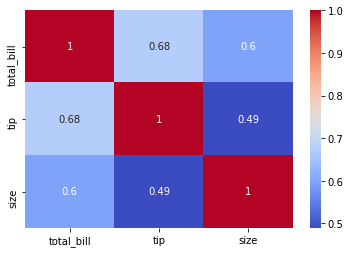

In [9]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [10]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


To change the flights dataframe into a matrix form, we need to use pivot_table()

In [0]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

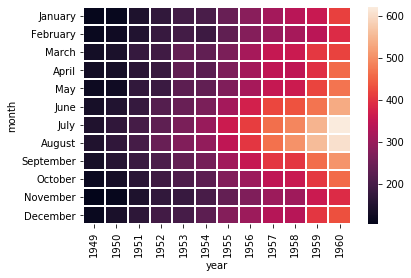

In [17]:
sns.heatmap(fp, linecolor='white', linewidths=1)

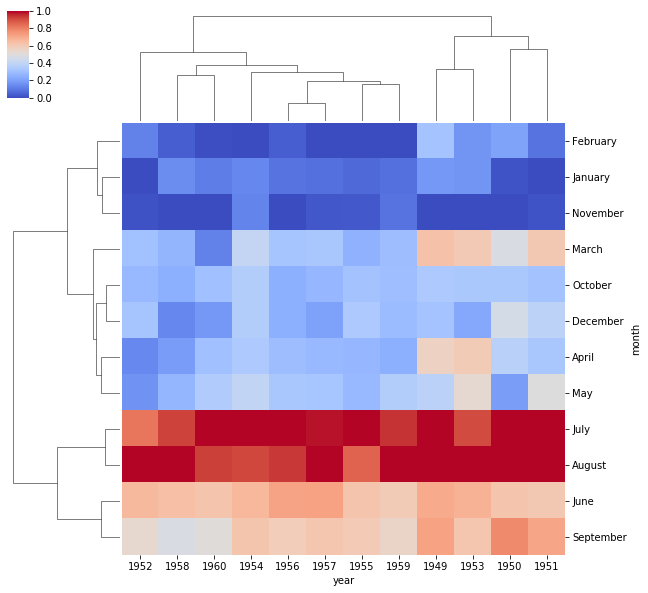

In [24]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)